In [52]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [6]:
data = pd.read_csv('gbm-data.csv')

In [7]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = data['Activity']
X = data.drop(['Activity'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.45s
         2           0.9192           11.16s
         3           0.8272            9.88s
         4           0.7834            8.73s
         5           0.7109            8.48s
         6           0.6368            9.07s
         7           0.5797            8.95s
         8           0.5610            8.41s
         9           0.5185            8.22s
        10           0.4984            7.87s
        20           0.1999            7.47s
        30           0.1313            6.75s
        40           0.0790            6.51s
        50           0.0511            6.19s
        60           0.0352            5.84s
        70           0.0245            5.68s
        80           0.0162            5.34s
        90           0.0114            4.94s
       100           0.0077            4.61s
       200           0.0004            1.33s
      Iter       Train Loss   Remaining Time 
        

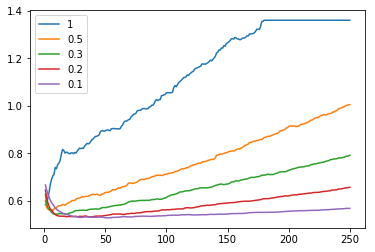

In [43]:
for l_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=l_rate)
    gbc.fit(X_train, y_train)
    
    test_deviance = []
    count_of_iter = 0
    log_loss_arr = []
    for y_pred in gbc.staged_decision_function(X_test):
        count_of_iter += 1
        log_loss_arr.append(log_loss(y_test, 1./(1 + np.exp(-y_pred))))
    plt.plot(np.linspace(1, count_of_iter, count_of_iter), log_loss_arr, label=str(l_rate))
    plt.legend()

### Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [51]:
with open('answer1.txt', 'w') as file:
    file.write('overfitting')

### Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [46]:
gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=0.2)
gbc.fit(X_train, y_train)
    
test_deviance = []
count_of_iter = 0
log_loss_arr = []
min_iter = np.inf
min_val = np.inf
for y_pred in gbc.staged_decision_function(X_test):
    count_of_iter += 1
    val = log_loss(y_test, 1./(1 + np.exp(-y_pred)))
    log_loss_arr.append(val)
    if min_val > val:
        min_val = val
        min_iter = count_of_iter

      Iter       Train Loss   Remaining Time 
         1           1.2613           11.95s
         2           1.1715           11.78s
         3           1.1009           11.69s
         4           1.0529           11.56s
         5           1.0130           12.00s
         6           0.9740           11.87s
         7           0.9475           11.07s
         8           0.9197           11.07s
         9           0.8979           10.58s
        10           0.8730           10.51s
        20           0.7207            8.53s
        30           0.6055            7.70s
        40           0.5244            7.13s
        50           0.4501            6.67s
        60           0.3908            6.28s
        70           0.3372            5.93s
        80           0.3009            5.59s
        90           0.2603            5.49s
       100           0.2327            5.10s
       200           0.0835            1.64s


In [50]:
with open('answer2.txt', 'w') as file:
    file.write('{} {}'.format(min_val, min_iter))

### На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [53]:
rfc = RandomForestClassifier(n_estimators=min_iter, random_state=241)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=37, n_jobs=None,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [57]:
answer3 = log_loss(y_test, rfc.predict_proba(X_test))

In [58]:
with open('answer3.txt', 'w') as file:
    file.write(str(round(answer3, 2)))